In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.base import TransformerMixin,BaseEstimator

In [2]:
# reading the data & some statistical methods (Require1):

data=pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# extract objected features columns :
data.select_dtypes("object").columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [7]:
# extract numerical columns:
data.select_dtypes("number").columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [8]:
#  extract discreate features(int64):
data.select_dtypes(include=["int64"]).columns

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], dtype='object')

In [9]:
# extract continous features(float64):
data.select_dtypes(include=["float64"]).columns

Index(['Age', 'Fare'], dtype='object')

In [10]:
#check the missing values:
data.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [11]:
# to know number of pepole survived , die :

data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
# to know number of brothers passengers:

data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [13]:
# extract range of Ages:

data["Age"].value_counts().rank().head(20)

24.0    88.0
22.0    87.0
18.0    86.0
19.0    84.0
28.0    84.0
30.0    84.0
21.0    82.0
25.0    81.0
36.0    80.0
29.0    79.0
32.0    76.5
35.0    76.5
27.0    76.5
26.0    76.5
16.0    73.5
31.0    73.5
20.0    70.5
34.0    70.5
33.0    70.5
23.0    70.5
Name: Age, dtype: float64

In [14]:
#unique odf data:

data.describe(include=["O"]).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [15]:
# to extract number of males and females:

data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
# whats of majourity cabines?

data["Cabin"].value_counts().rank().head(25)

B96 B98        146.0
G6             146.0
C23 C25 C27    146.0
C22 C26        142.0
F33            142.0
F2             142.0
E101           142.0
D              142.0
C78            120.5
C93            120.5
E8             120.5
D36            120.5
B77            120.5
C123           120.5
E121           120.5
E44            120.5
D35            120.5
C125           120.5
E67            120.5
B35            120.5
B18            120.5
E24            120.5
B49            120.5
C65            120.5
B20            120.5
Name: Cabin, dtype: float64

In [17]:
data["SibSp"].describe().T

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

<AxesSubplot:xlabel='Pclass'>

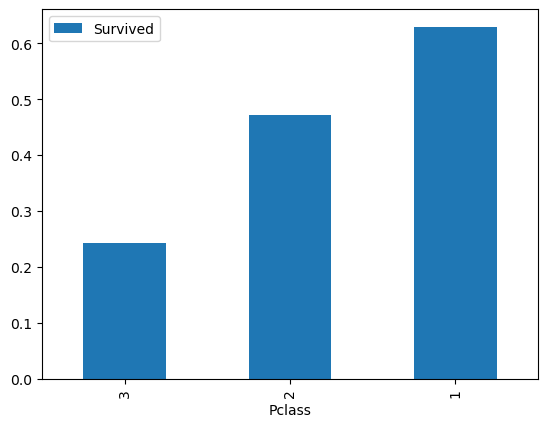

In [18]:
# some important plots : (Require 2)

data.groupby(["Pclass"])["Survived"].mean().sort_values(ascending=True).plot(kind="bar",legend=True)

<AxesSubplot:xlabel='SibSp'>

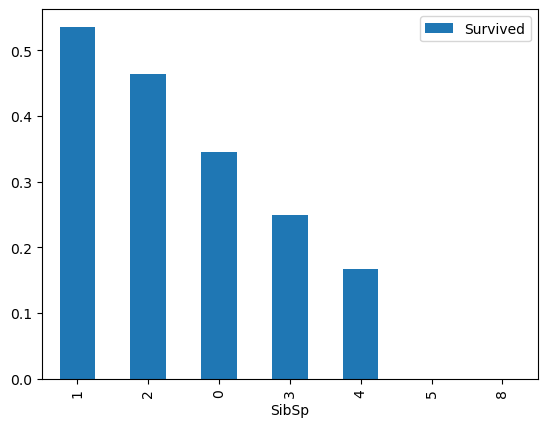

In [19]:
data.groupby(["SibSp"])["Survived"].mean().sort_values(ascending=False).plot(kind="bar",legend=True)

Survived
0    AxesSubplot(0.125,0.11;0.775x0.77)
1    AxesSubplot(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

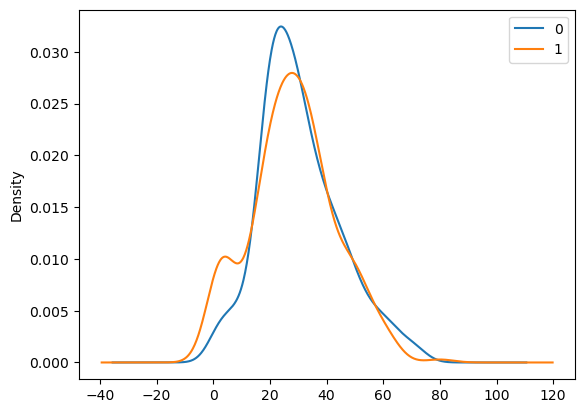

In [20]:
data.groupby(["Survived"])["Age"].plot(kind="kde",legend=True)

G:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived', ylabel='Density'>

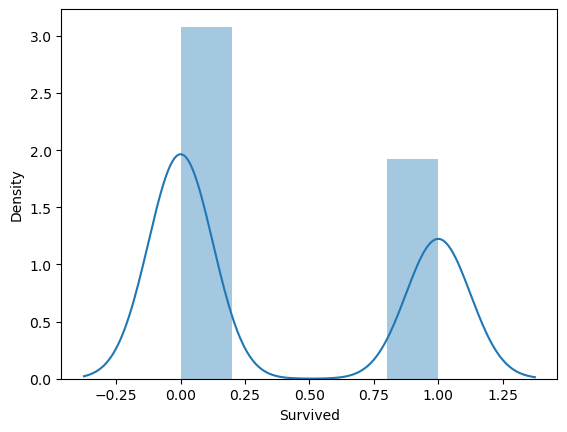

In [21]:
sns.distplot(data["Survived"])

<AxesSubplot:xlabel='Age', ylabel='Density'>

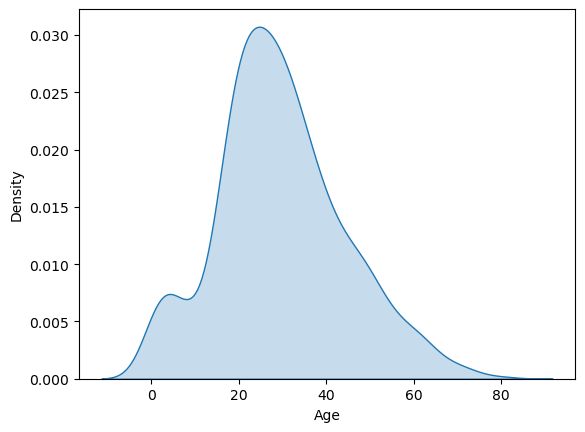

In [22]:
sns.kdeplot(data["Age"],shade=True)

G:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

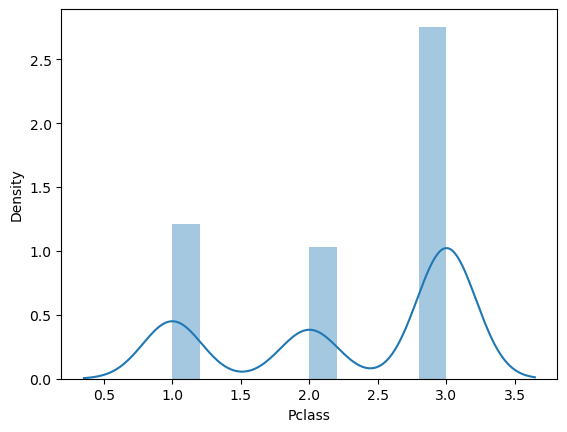

In [23]:
sns.distplot(data["Pclass"])

G:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

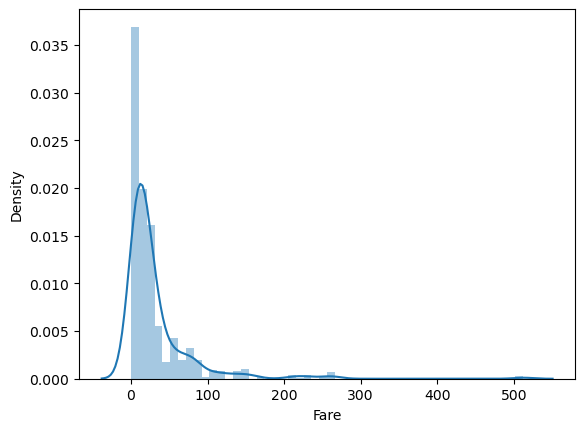

In [24]:
sns.distplot(data["Fare"])

<AxesSubplot:>

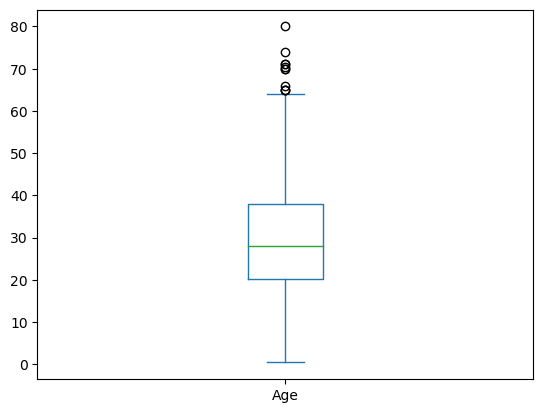

In [25]:
data["Age"].plot(kind="box")

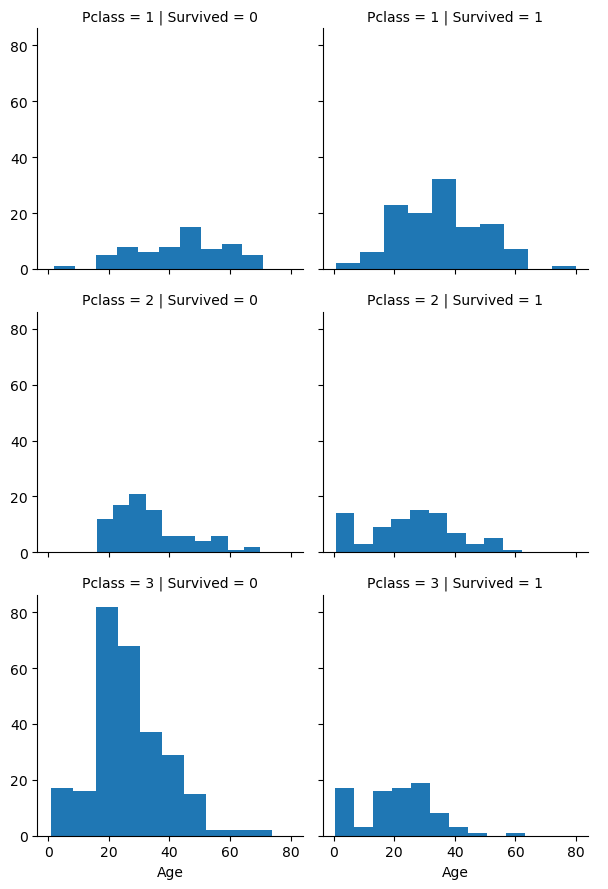

In [26]:
# How Pclass with Age effect on survived passengers:

grid=sns.FacetGrid(data,col="Survived",row="Pclass")
grid.map(plt.hist,"Age")
grid.add_legend()

G:\anaconda\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
G:\anaconda\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


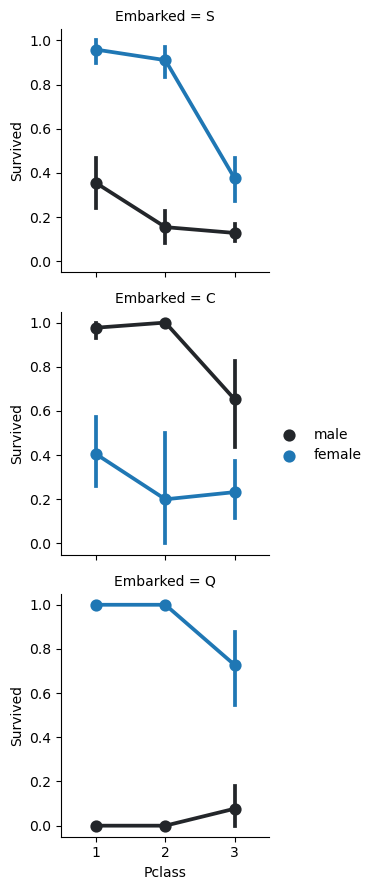

In [27]:
# How sex with Embarked effect on survived passengers:

grid=sns.FacetGrid(data,row="Embarked")
grid.map(sns.pointplot,"Pclass","Survived","Sex")
grid.add_legend()

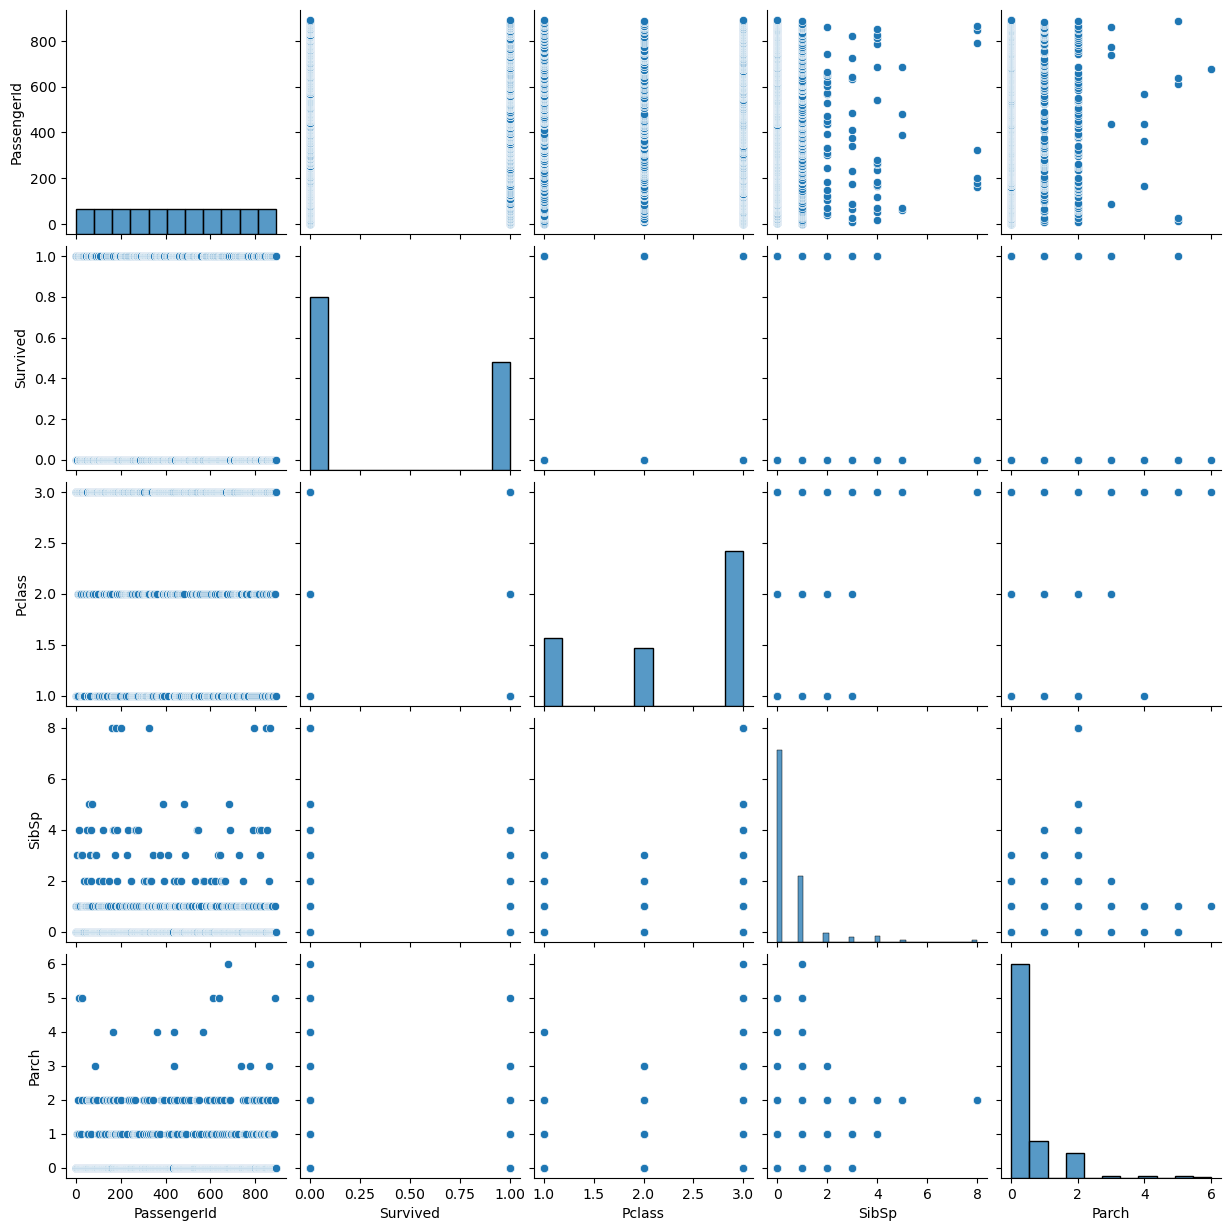

In [28]:
# to plot random pairplot for discrete data:

sns.pairplot(data.select_dtypes(include=["int64"]))

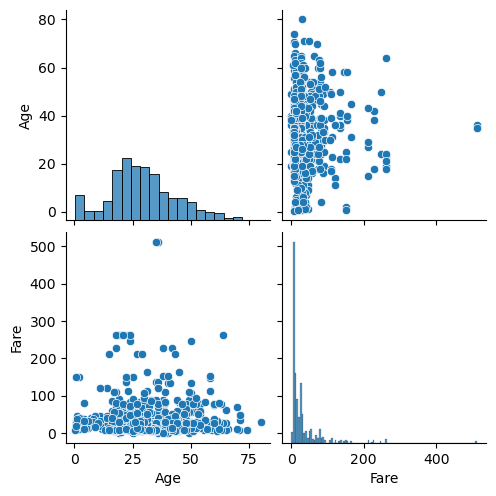

In [31]:
# to plot random pairplot for continous data:
sns.pairplot(data.select_dtypes(include=["float64"]))

In [32]:
# Handle the missing value : Require(3)
#1-by using pandas(mean,mode,median,linearimpution) :
#2-by using Simpleimputer from sklearn:

data.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [33]:
# as Cabin contain on 77% from nan values then we drop it if not important:

data=data.drop(columns="Cabin")
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [34]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [35]:
# As the Embarked column that contain the categorical data then we will fillina it by using mode()
# as there is median in the Age we use the median:

data =data.fillna({"Age":data['Age'].median(),
 "Embarked":data['Embarked'].mode()[0]})


In [36]:
# see if threre null values after handling the missing values:
data.isna().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [37]:
# Simple imputer from sklearn to handle the missing values:

from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy="median")
imputer.fit(data["Age"].values.reshape(1,-1))
imputer.transform(data["Age"].values.reshape(1,-1))

array([[22.  , 38.  , 26.  , 35.  , 35.  , 28.  , 54.  ,  2.  , 27.  ,
        14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 28.  ,
        31.  , 28.  , 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  , 28.  ,
        19.  , 28.  , 28.  , 40.  , 28.  , 28.  , 66.  , 28.  , 42.  ,
        28.  , 21.  , 18.  , 14.  , 40.  , 27.  , 28.  ,  3.  , 19.  ,
        28.  , 28.  , 28.  , 28.  , 18.  ,  7.  , 21.  , 49.  , 29.  ,
        65.  , 28.  , 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
         4.  , 28.  , 28.  , 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
        21.  , 26.  , 32.  , 25.  , 28.  , 28.  ,  0.83, 30.  , 22.  ,
        29.  , 28.  , 28.  , 17.  , 33.  , 16.  , 28.  , 23.  , 24.  ,
        29.  , 20.  , 46.  , 26.  , 59.  , 28.  , 71.  , 23.  , 34.  ,
        34.  , 28.  , 28.  , 21.  , 33.  , 37.  , 28.  , 21.  , 28.  ,
        38.  , 28.  , 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
        29.  , 24.  ,  2.  , 21.  , 28.  , 32.5 , 32.5 , 54.  , 12.  ,
      

In [38]:
# detect the outlier:
data.describe()

# by comparing mean and 50% quantile for Age & Fare we found that there is outlier 





,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Age'>

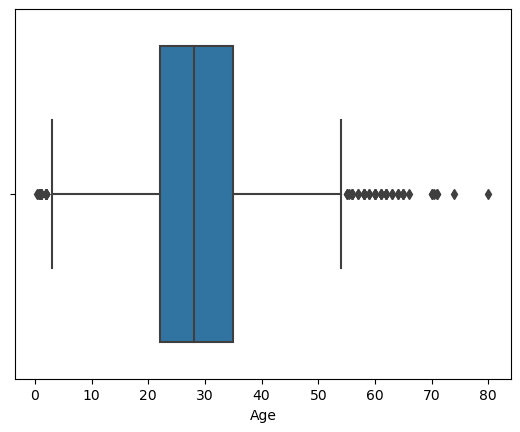

In [39]:
# we use the boxplot & scatterolot to detect the outlier:

sns.boxplot(x=data["Age"])


<AxesSubplot:xlabel='Age'>

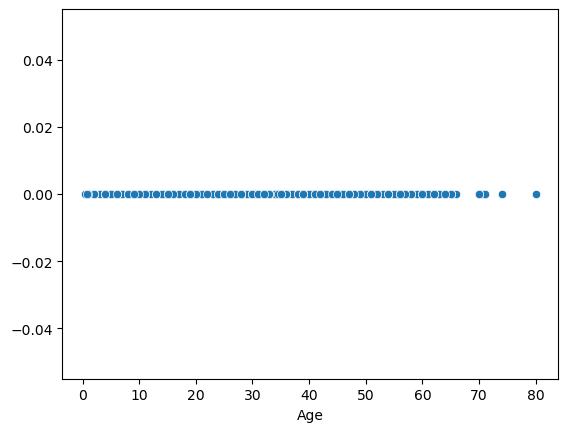

In [40]:
sns.scatterplot(x=data["Age"],y=np.zeros_like(data["Age"]))

<AxesSubplot:xlabel='Fare'>

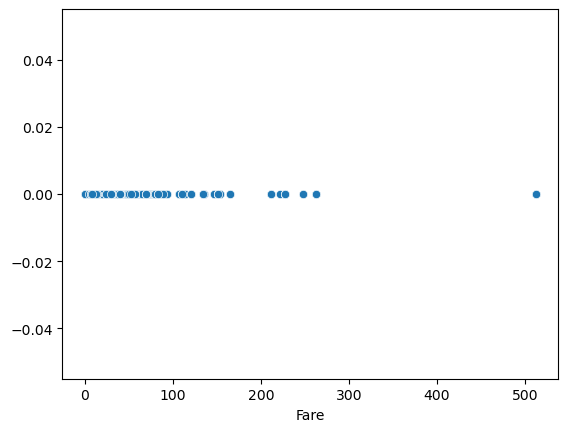

In [41]:
# scatter plot & boxplot for Fare column to detect the outlier:

sns.scatterplot(x=data["Fare"],y=np.zeros_like(data["Fare"]))

<AxesSubplot:xlabel='Fare'>

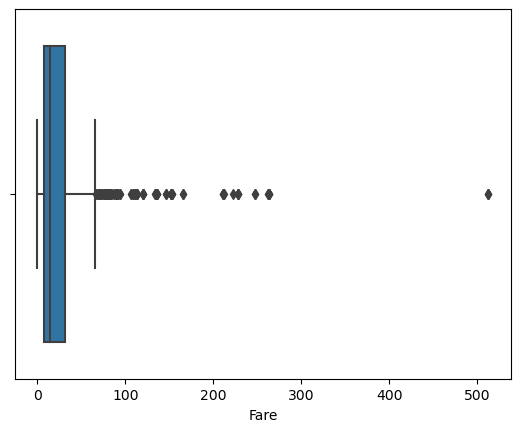

In [42]:
sns.boxplot(x=data["Fare"])

In [43]:
# calc the outlier for Age:

Q1_Age,Q3_Age=data["Age"].quantile([0.25,0.75])
IQR_Age=Q3_Age-Q1_Age

print('Q1_Age=',Q1_Age)
print("Q3_AGE=",Q3_Age)
print("IQR_Age=",IQR_Age)

low_lim_Age=Q1_Age-1.5*IQR_Age
upper_lim_Age=Q3_Age+1.5*IQR_Age

outlier_Age=[]
print("outlier=",outlier_Age)
print("low_lim_Age=",low_lim_Age)
print("upper_lim_Age=",upper_lim_Age)

outlier_Age =[] 
for x in data["Age"]: 
    if ((x> upper_lim_Age) or (x<low_lim_Age)): 
         outlier_Age.append(x)

Q1_Age= 22.0
Q3_AGE= 35.0
IQR_Age= 13.0
outlier= []
low_lim_Age= 2.5
upper_lim_Age= 54.5


In [44]:
len(outlier_Age)

66

In [46]:
print(outlier_Age)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


upper_limit :  68.42067214450208
lower_limit :  -9.697507161337093
Mean Value :  29.36158249158249
1st Standard Deviation :  13.019696550973194


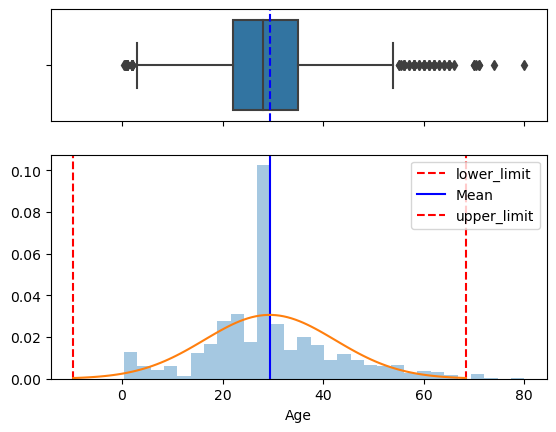

In [47]:
#Another way to calculate outlier:-


from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

mean=data.Age.mean()
std = data.Age.std()
median = data.Age.median()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(x=data["Age"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(data["Age"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
#print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

In [48]:
#Calc the Variance Thershold & correlation   :

data["crew"]=1
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,crew
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [49]:
num_col=data.select_dtypes("number").columns
num_col

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'crew'],
      dtype='object')

In [50]:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))
selector.get_support(indices=True)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [51]:
# to show the names of features :

num_col[selector.get_support(indices=True)]

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [52]:
data.describe(include=["O"]).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Embarked,891,3,S,646


In [53]:
# create transformer to remove high and low cardinality categorical or (low-high) varience:


from sklearn.base import BaseEstimator , TransformerMixin

class Var_Selector(BaseEstimator,TransformerMixin):
    
    def __init__(self,num_cols):
        self.num_cols=None
    def fit(self,data):
        self.num_cols=data.select_dtypes("number").columns
        return self
    def transform(self,data):
        selector=VarianceThreshold(threshold=0.01)
        selector.fit(data[self.num_cols])
        
        removed_cols=[column for column in self.num_cols if column not in \
                     self.num_cols[selector.get_support(indices=True)]]
        data=data.drop(columns=removed_cols)
        
        # remove high-low cardinality categorical:-
        
        removed_cols=data.nunique()[((data.nunique()==1)|data.nunique()==len(data))].index
        
        return data.drop(columns=removed_cols)
        

In [54]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,crew
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1


In [55]:
transform=Var_Selector(data)
transform.fit(data)
transform.transform(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [56]:
# removed the duplicate features :

df=data.T
duplicate_feature=df.duplicated().sum()
duplicate_feature

0

In [57]:
data.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,crew
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


In [58]:
# Calculate the correlation with different methods :-

# 1- using pandas :

data.select_dtypes("number").corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,crew
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,NaN
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,NaN
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,NaN
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,NaN
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,NaN
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,NaN
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,NaN
crew,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# 2- using pearson :
data.select_dtypes("number").corr(method="pearson")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,crew
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,NaN
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,NaN
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,NaN
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,NaN
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,NaN
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,NaN
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,NaN
crew,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# 3- usng spearman:

data.select_dtypes("number").corr(method="spearman")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,crew
PassengerId,1.000000,-0.005007,-0.034091,0.034584,-0.061161,0.001235,-0.013975,NaN
Survived,-0.005007,1.000000,-0.339668,-0.037004,0.088879,0.138266,0.323736,NaN
Pclass,-0.034091,-0.339668,1.000000,-0.317406,-0.043019,-0.022801,-0.688032,NaN
Age,0.034584,-0.037004,-0.317406,1.000000,-0.145316,-0.217488,0.126006,NaN
SibSp,-0.061161,0.088879,-0.043019,-0.145316,1.000000,0.450014,0.447113,NaN
Parch,0.001235,0.138266,-0.022801,-0.217488,0.450014,1.000000,0.410074,NaN
Fare,-0.013975,0.323736,-0.688032,0.126006,0.447113,0.410074,1.000000,NaN
crew,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# 3- usng kendell:

data.select_dtypes("number").corr(method="kendall")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,crew
PassengerId,1.000000,-0.004090,-0.026824,0.023575,-0.048394,0.000798,-0.008921,NaN
Survived,-0.004090,1.000000,-0.323533,-0.031055,0.085915,0.133933,0.266229,NaN
Pclass,-0.026824,-0.323533,1.000000,-0.254206,-0.039552,-0.021019,-0.573531,NaN
Age,0.023575,-0.031055,-0.254206,1.000000,-0.115427,-0.174819,0.087221,NaN
SibSp,-0.048394,0.085915,-0.039552,-0.115427,1.000000,0.425241,0.358262,NaN
Parch,0.000798,0.133933,-0.021019,-0.174819,0.425241,1.000000,0.330360,NaN
Fare,-0.008921,0.266229,-0.573531,0.087221,0.358262,0.330360,1.000000,NaN
crew,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


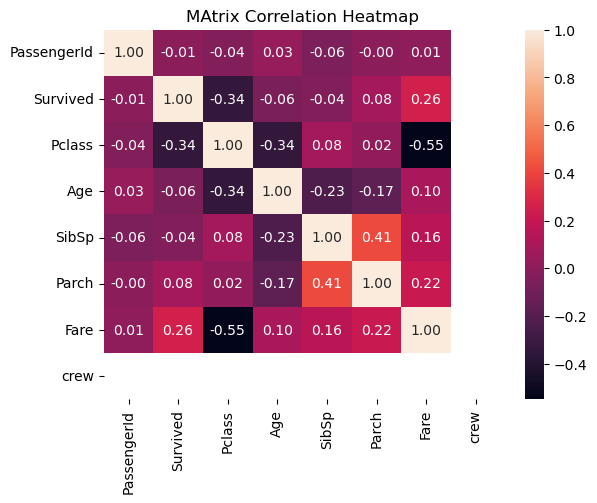

In [62]:
# plot of heatmap correlation :

sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.2f")
plt.title("MAtrix Correlation Heatmap")
plt.show()

In [63]:
#select the most 5 features correlation (Require4):

from sklearn.feature_selection import f_classif, SelectKBest

fs=SelectKBest(score_func=f_classif,k=5)
fs.fit(data.drop(columns="Survived").select_dtypes("number").fillna(0),data["Survived"])

SelectKBest(k=5)

In [64]:
print(["{:10f}".format(p) for p in fs.pvalues_])

['  0.881366', '  0.000000', '  0.052761', '  0.292244', '  0.014799', '  0.000000', '       nan']


In [65]:
print(["{:10f}".format(p) for p in fs.scores_])

['  0.022285', '115.031272', '  3.761528', '  1.110572', '  5.963464', ' 63.030764', '       nan']


In [66]:
features_pvalues=pd.DataFrame(fs.pvalues_)
fatures_scores=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data.drop(columns="Survived").select_dtypes("number").fillna(0).columns)

In [67]:
feature_score=pd.concat([features_pvalues,fatures_scores,features],axis=1)
feature_score.columns=["pvalues","score","input"]
feature_score

,pvalues,score,input
0,8.813658e-01,0.022285,PassengerId
1,2.537047e-25,115.031272,Pclass
2,5.276069e-02,3.761528,Age
3,2.922439e-01,1.110572,SibSp
4,1.479925e-02,5.963464,Parch
5,6.120189e-15,63.030764,Fare
6,NaN,NaN,crew


In [68]:
# Another way fo select the most 5 features(Entrop way):

from sklearn.feature_selection import mutual_info_classif

mic=SelectKBest(score_func=mutual_info_classif,k=5)
mic.fit(data.drop(columns="Survived").select_dtypes("number").fillna(0),data["Survived"])

features_MI_scores=pd.Series(mic.scores_,index=data.drop(columns="Survived").select_dtypes("number").fillna(0).columns)
features_MI_scores.sort_values(ascending=True)

Age            0.000000
crew           0.004796
PassengerId    0.014110
Parch          0.030266
Pclass         0.046307
SibSp          0.054615
Fare           0.131591
dtype: float64

In [69]:
# Decesion Tree (Require5):-

# drop the not important columns:

data=data.drop(columns=["Name","Ticket"])
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,crew
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,1
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,1
4,5,0,3,male,35.0,0,0,8.0500,S,1


In [70]:
# using the dummies to transform:

data=pd.get_dummies(data)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,crew,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,0,1


In [71]:
# Divivide the data to x,y:

x=data.drop("Survived",axis=1)
y=data["Survived"]

In [72]:
# train_test_split:

from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)

In [73]:
#Desion tree:

# create tree:-
from sklearn import tree
model=tree.DecisionTreeClassifier(max_depth=4,random_state=42)
# fit the model:

model.fit(x_train,y_train)



DecisionTreeClassifier(max_depth=4, random_state=42)

In [74]:
# calc the accuracy:

print(f"model_accuracy={model.score(x_test,y_test)*100:0.2f}%")

model_accuracy=79.85%


In [75]:
#explain prediction:

text_representation = tree.export_text(model)
print(text_representation)

|--- feature_7 <= 0.50
|   |--- feature_2 <= 3.50
|   |   |--- feature_3 <= 3.00
|   |   |   |--- class: 1
|   |   |--- feature_3 >  3.00
|   |   |   |--- class: 0
|   |--- feature_2 >  3.50
|   |   |--- feature_1 <= 1.50
|   |   |   |--- feature_0 <= 187.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  187.00
|   |   |   |   |--- class: 0
|   |   |--- feature_1 >  1.50
|   |   |   |--- feature_5 <= 48.09
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  48.09
|   |   |   |   |--- class: 0
|--- feature_7 >  0.50
|   |--- feature_1 <= 2.50
|   |   |--- feature_5 <= 28.86
|   |   |   |--- feature_5 <= 28.23
|   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  28.23
|   |   |   |   |--- class: 0
|   |   |--- feature_5 >  28.86
|   |   |   |--- feature_4 <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  1.50
|   |   |   |   |--- class: 1
|   |--- feature_1 >  2.50
|   |   |--- feature_5 <= 7.89
|   |   |   |--- feature_2 <= 29.25
|   |   |  

In [ ]:
plt.figure(figsize=(100,100))

#plot the tree:-

tree.plot_tree(model,max_depth=5)
plt.show()